### Domain Knowledge

The dataset contains data on the engine size, number of cylinders, fuel consumption, and carbon dioxide gas emissions of some vehicles. Assume that carbon-dioxide emissions are the target variable in this dataset; that is, given the engine size, number of cylinders, and fuel consumption of a new car, you want to predict the car's carbon-dioxide emissions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-fuel-consumption.csv'
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


###### We ignore the categorical (MODELYEAR, MAKE, MODEL,VEHICLECLASS,TRANSMISSION and FUELTYPE) variable here. And we run the statsmodel and get OLS Regression results

In [4]:
# Now our target/dependent variable is y=CO2EMISSIONS and others (ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG) are independent variable

# Define the formula for the linear regression model
# formula = 'y ~ x'

formula = 'CO2EMISSIONS ~ ENGINESIZE+CYLINDERS+FUELCONSUMPTION_CITY+FUELCONSUMPTION_HWY+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG'

# Fit the linear regression model using the formula
model = smf.ols(formula=formula, data=df).fit()

# Print the summary of the fitted model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1419.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:47:29   Log-Likelihood:                -4766.4
No. Observations:                1067   AIC:                             9547.
Df Residuals:                    1060   BIC:                             9582.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

##### Those P>|t| values greater than 0.05 (FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB) aren't good for the model. And we ignore these variables.

##### We will set feature x and target y as the key variables according to the OLS Regression Results.

In [5]:
x = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']

##### Now we will keep 25% of the of the data for testing and train the model with the remaining data.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

##### Our model is now ready to make predictions. We now let the model make predictions with the feature portion of the test dataset as input.

In [7]:
predictions = linear_regression.predict(x_test)

In [10]:
pdf = pd.DataFrame({"Actual": y_test, "Predicted": predictions})
pdf

,Actual,Predicted
732,304,310.982882
657,221,246.531447
168,294,282.416805
86,221,241.052494
411,207,208.612270
...,...,...
110,292,302.725573
453,271,280.147462
554,306,314.270254
700,290,283.512596


##### Now it's time to check the accuracy

In [13]:
print("Coefficients:", linear_regression.coef_)
print("Intercept:", linear_regression.intercept_)

Coefficients:  [10.95790465  5.77122168 -4.96993834]
Intercept:  317.6796620848199


In [17]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2:", r2_score(y_test, predictions))

MAE: 14.09865409301018
MSE: 455.1552945632145
RMSE: 21.334368857859715
R2: 0.8902704501188249


In [16]:
# Accuracy check

accuracy = linear_regression.score(x_test, y_test)
print("Accuray:", accuracy*100, '%')

Accuray: 89.02704501188249 %


##### We can see that, Model can predict 89% accuray.

##### We can also check train set accuracy

In [20]:
print("Train set accuracy:", r2_score(y_train, linear_regression.predict(x_train)))
print("Test set accuracy:", r2_score(y_test, predictions))

Train set accuracy: 0.8813869597467152
Test set accuracy: 0.8902704501188249


#### Regression Plot

<AxesSubplot: xlabel='CO2EMISSIONS'>

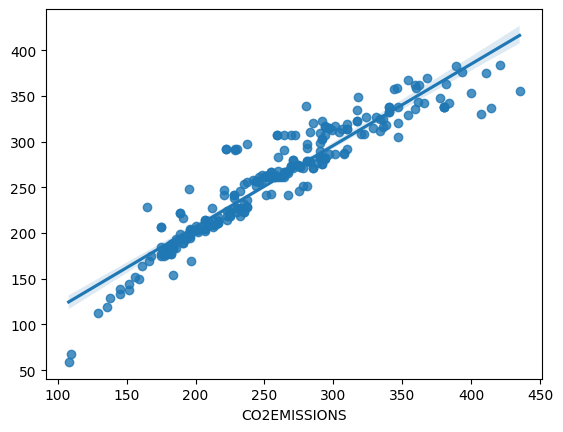

In [21]:
sns.regplot(x=y_test, y=predictions)

#### We can also draw a plot comparing the prediction vs the original value

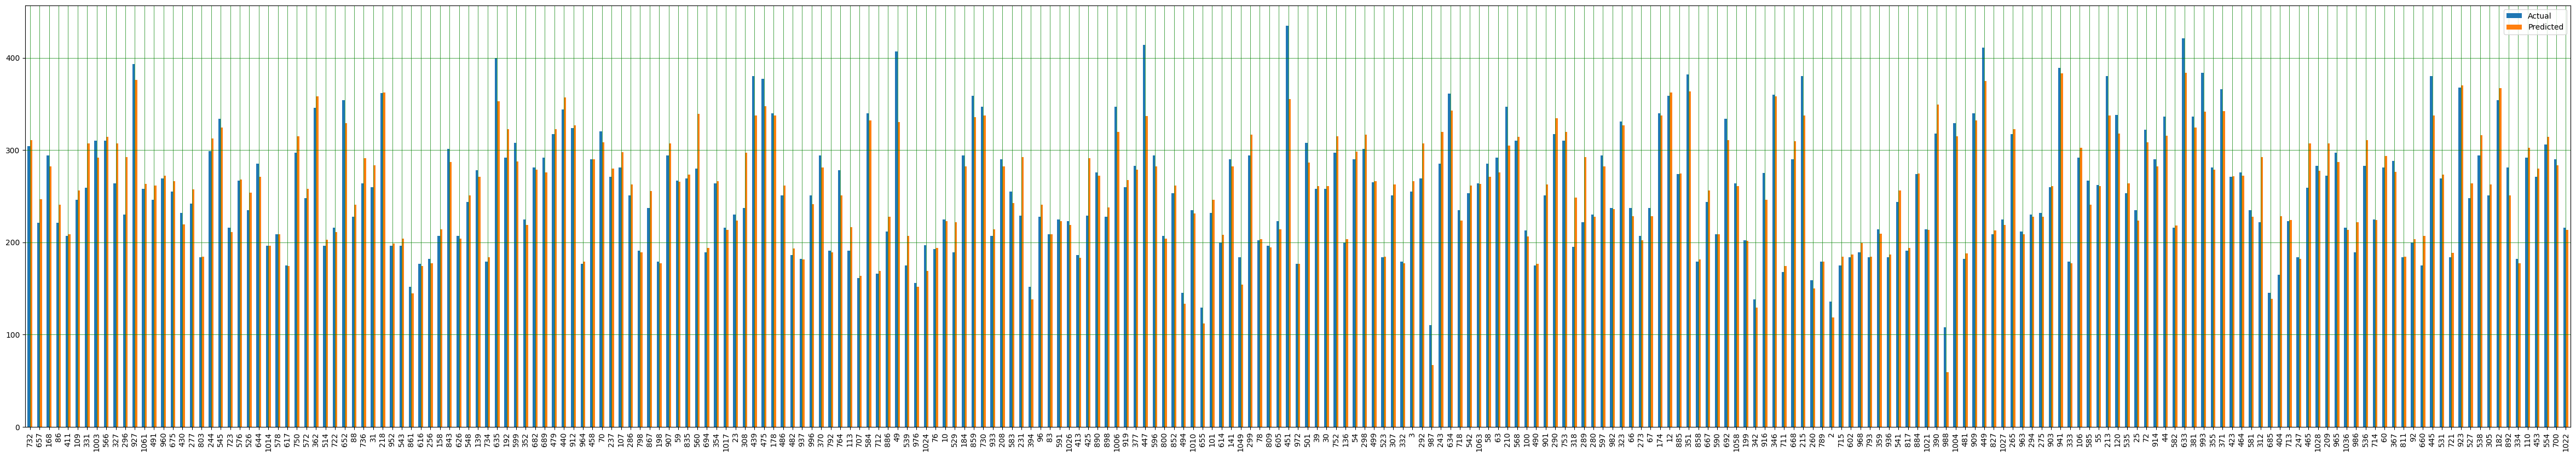

In [22]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

#actual vs predicted plot
df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

##### Now it's time to predict, suppose a car has ENGINESIZE = 4, CYLINDERS = 4 and FUELCONSUMPTION_COMB_MPG = 6 what will be the CO2EMISSIONS?

In [23]:
new_observation = [[4, 4, 6]]
linear_regression.predict(new_observation)

C:\Users\SK\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([354.77653738])

##### array([348.55367627]) means our model predicts the carbon-dioxide emission of this car to be 348.55367627 units.